In [1]:
import mdtraj as md
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
z_mb_upper_10 = np.zeros((10,6001))
z_mb_lower_10 = np.zeros((10,6001))
z_helix_10 = np.zeros((10,6001))
box_z_10 = np.zeros((10,6001))
len_1 = np.zeros(10)

#helix_cg_10_x = np.zeros((10,3,2001))
#helix_cg_10_y = np.zeros((10,3,2001))
helix_cg_10_z = np.zeros((10,6001))
trunc_10 = np.zeros(10)


for i in range(10):
    path = 'run%d/'%(i+1)
    traj = md.load_xtc('%ssys_hydro_run_pbc_promb_10.xtc'%path, top = '%ssys_hydro_run_promb.gro'%path)
    xyz = traj.xyz
    top = traj.topology
    table, bonds = top.to_dataframe()
    z_dppc = xyz[:,table.name == 'PO4',2]

    z_midplane = np.mean(z_dppc, axis = 1)
    z_mb_upper = np.zeros(np.shape(z_midplane))
    z_mb_lower = np.zeros(np.shape(z_midplane))
    z_pro_upper = np.zeros(np.shape(z_midplane))
    z_pro_lower = np.zeros(np.shape(z_midplane))

    for j in range(len(z_midplane)):
        temp = z_dppc[j,:]
        z_mb_upper[j] = np.mean(temp[temp>z_midplane[j]])
        z_mb_lower[j] = np.mean(temp[temp<z_midplane[j]]) 

        temp = xyz[j,table.resName != 'DPPC',2]
        #if(np.mean(temp)<z_mb_upper[j]):
        #    temp = temp + traj.unitcell_lengths[j,2]
        z_pro_upper[j] = np.max(temp)
        z_pro_lower[j] = np.min(temp)

    dt = 1e-3
    t = np.arange(len(z_midplane))*dt
    capture_time = np.max(t[~((z_pro_upper > z_mb_lower) & (z_pro_lower < z_mb_upper+0.1))]) + dt
    print(capture_time)

    table_pro = table[table.resName != 'DPPC']
    xyz_pro = xyz[:,table.resName != 'DPPC',:]
    xyz_com = np.mean(xyz_pro[:,:,:],axis=1)
    xyz_helix = np.mean(xyz_pro[:,(table_pro.resSeq<11)&(table_pro.resSeq>1),:],axis=1)
    
    trunc = int(capture_time/dt)
    helix_cg_cali = np.min([abs(xyz_helix[:,2] - z_mb_upper), abs(z_mb_lower+traj.unitcell_lengths[:,2]-xyz_helix[:,2])], axis=0)
    
    
    z_mb_upper_10[i,:] = z_mb_upper
    z_mb_lower_10[i,:] = z_mb_lower
    z_helix_10[i,:] = xyz_helix[:,2]
    helix_cg_10_z[i,:] = helix_cg_cali
    trunc_10[i] = trunc
    box_z_10[i,:] = traj.unitcell_lengths[:,2]
    
    '''
    temp = helix_cg_cali[:trunc-1]
    a1 = np.where(temp>1)[0]
    a2 = np.where(temp<=1)[0]
    if (np.sum(a2>np.max(a1))):
        temp = temp[:np.min(a2[a2>np.max(a1)])+1]
    '''
    temp = helix_cg_cali[:trunc]
    
    if(i==0):
        sep_stat = temp.copy()
    else:
        sep_stat = np.append(sep_stat, temp.copy())
    
    len_1[i] = np.sum(helix_cg_cali[:trunc-1]<1)


0.08
0.548
0.40700000000000003
0.837
3.427
1.363
0.8190000000000001
0.14100000000000001
2.657
0.155


In [8]:
np.sum(sep_stat<1)

54

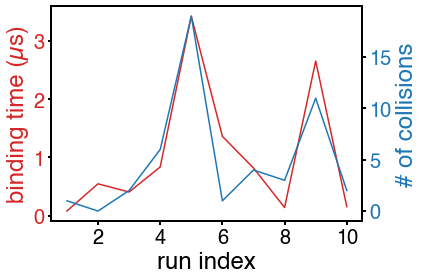

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('run index')
ax1.set_ylabel('binding time (µs)', color=color)
ax1.plot(np.linspace(1,10,10),trunc_10/1000, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of collisions', color=color)  # we already handled the x-label with ax1
ax2.plot(np.linspace(1,10,10),len_1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xlim([0.5,10.5])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

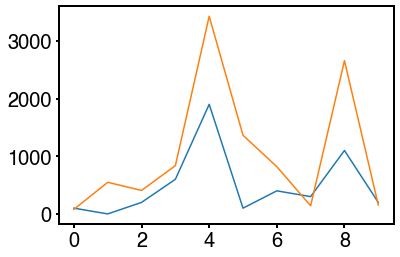

In [26]:
plt.plot(len_1*100)
plt.plot(trunc_10)

In [33]:
43 / len(sep_stat) * 1000

4.121142419014759

In [20]:
10/60

0.16666666666666666

In [ ]:
a1 = np.where(helix_cg_cali[:trunc-1]>1)[0]
a2 = np.where(helix_cg_cali[:trunc-1]<=1)[0]
np.min(a2[a2>np.max(a1)])

In [25]:
np.sum(sep_stat<1) / len(sep_stat) * 1000

5.175388154111558

In [31]:
10/15

0.6666666666666666

In [29]:
np.average(trunc_10)/1000*4

4.1736

In [5]:
54 / 41.736 * 5.5/2

3.5580793559516968

In [4]:
10 / 60*10

1.6666666666666665

In [6]:
3.5580793559516968 / 1.6666666666666665

2.134847613571018

In [32]:
5.175388154111558 / 0.6666666666666666 * 4.1736

32.400000000000006

In [8]:
np.sum(sep_stat<1.6)/10

112.2

In [22]:
np.sum(sep_stat<1)/10

4.3

In [14]:
np.sum(sep_stat<1)/(len(sep_stat)/1000*4)

1.2938470385278897

In [ ]:
plt.plot(z_mb_lower,'k')
plt.plot(z_mb_upper,'k')
#plt.plot(z_pro_upper,'b')
#plt.plot(z_pro_lower,'b')
plt.plot(helix_cg_cali)
#plt.plot(z_mb_lower+traj.unitcell_lengths[:,2],'k')
plt.xlim([0,trunc])

In [ ]:
capture_time

In [ ]:
trunc = int(capture_time/dt)
helix_cg_cali = np.min([abs(xyz_helix[:,2] - z_mb_upper), abs(z_mb_lower+traj.unitcell_lengths[:,2]-xyz_helix[:,2])], axis=0)

In [ ]:
a1 = abs(xyz_helix[:,2] - z_mb_upper)
a2 = abs(z_mb_lower+traj.unitcell_lengths[:,2]-xyz_helix[:,2])

In [ ]:
i=2
plt.plot(z_mb_upper_10[i,:int(trunc_10[i])],'r')
plt.plot(z_mb_upper_10[i,:int(trunc_10[i])]+1,'k')
plt.plot(z_mb_lower_10[i,:int(trunc_10[i])],'r')
plt.plot(box_z_10[i,:int(trunc_10[i])]+z_mb_lower_10[i,:int(trunc_10[i])],'g')
plt.plot(box_z_10[i,:int(trunc_10[i])]+z_mb_lower_10[i,:int(trunc_10[i])]-1,'k')

plt.plot(z_helix_10[i,:int(trunc_10[i])])
#plt.plot(trunc,6,'ko')

In [ ]:
np.min([a1,a2],axis=0)

In [ ]:
np.shape(helix_cg_10_z)

In [ ]:
a2

In [4]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 4

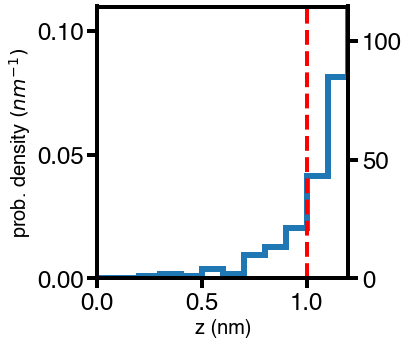

In [20]:
fig, ax1 = plt.subplots(figsize=(4.5,5))
plt.hist(sep_stat[sep_stat<4],density=True,bins=np.linspace(0,2.8,29),linewidth=2,alpha=1,histtype='step',lw=6)
plt.xlim([0,1.2])
plt.ylim([0,0.11])
plt.plot([1,1],[0,0.2],'r--',linewidth=4)
ax1.set_yticks([0,0.05,0.1])
#plt.title('EI simulation',fontsize=28)
plt.ylabel('prob. density $(nm^{-1})$')
plt.xlabel('z (nm)')

ax2 = ax1.twinx()
plt.hist(sep_stat[sep_stat<4],bins=np.linspace(0,2.8,29),density=False,alpha=1,histtype='step',lw=0)
plt.xlim([0,1.2])
plt.ylim([0,len(sep_stat[sep_stat<4])*0.1*0.11])
ax2.set_yticks([0,50,100])




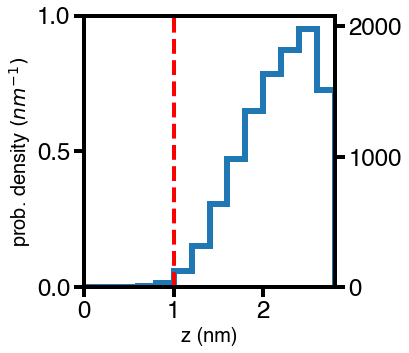

In [18]:
fig, ax1 = plt.subplots(figsize=(4.5,5))
plt.hist(sep_stat[sep_stat<4],density=True,bins=np.linspace(0,3,16),linewidth=2,alpha=1,histtype='step',lw=6)
plt.xlim([0,2.8])
plt.ylim([0,1.0])
plt.plot([1,1],[0,24],'r--',linewidth=4)
ax1.set_yticks([0,0.5,1])
#plt.title('EI simulation',fontsize=28)
plt.ylabel('prob. density $(nm^{-1})$')
plt.xlabel('z (nm)')

ax2 = ax1.twinx()
plt.hist(sep_stat[sep_stat<4],bins=np.linspace(0,3,16),density=False,alpha=1,histtype='step',lw=0)
plt.xlim([0,2.8])
plt.ylim([0,len(sep_stat[sep_stat<4])*0.2])
ax2.set_yticks([0,1000,2000])




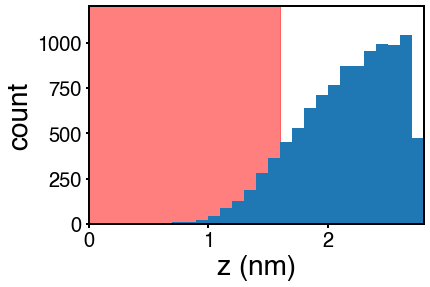

In [39]:
plt.hist(sep_stat[sep_stat<4],bins=np.linspace(0,2.8,29))
plt.xlim([0,2.8])
plt.ylabel('count')
plt.xlabel('z (nm)')
#plt.title('FP simulation',fontsize=28)
plt.ylim([0,1200])
plt.fill_between([0,1.6],[0,0],[1400,1400],color = 'r',alpha=0.5)
#plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])
#for axis in ['top','bottom','left','right']:
#    plt.gca().spines[axis].set_linewidth(3)